In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
data = pd.read_csv("pca_data.csv", header=None).to_numpy()
data

array([[ 1.38208529, -3.03878432,  0.48060784, -3.65669903],
       [ 2.57419549, -3.94455185,  0.02772408, -3.37035636],
       [ 4.23309042, -3.55937724,  0.22031138, -1.32628683],
       ...,
       [ 4.50207265, -1.15309647,  1.42345177,  1.34897618],
       [ 3.28799906, -3.59917944,  0.20041028, -2.31118038],
       [ 3.64854758, -2.13427927,  0.93286036, -0.4857317 ]])

In [157]:
std_data = data - data.mean(axis=0)
std_data

array([[-2.61800495, -1.0177104 , -0.5088552 , -3.63571536],
       [-1.42589475, -1.92347794, -0.96173897, -3.34937269],
       [ 0.23300018, -1.53830333, -0.76915167, -1.30530315],
       ...,
       [ 0.50198241,  0.86797744,  0.43398872,  1.36995985],
       [-0.71209117, -1.57810553, -0.78905277, -2.29019671],
       [-0.35154266, -0.11320536, -0.05660268, -0.46474802]])

In [158]:
cov_std = np.cov(std_data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_std)

dimensions = 2

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues, sorted_eigenvectors = eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]
top_k_eigenvectors = sorted_eigenvectors[:, :dimensions]
top_k_eigenvectors

array([[-0.31687382,  0.73651078],
       [-0.47156075, -0.59081218],
       [-0.23578037, -0.29540609],
       [-0.78843456,  0.1456986 ]])

In [159]:
final_data = np.dot(std_data, top_k_eigenvectors)
final_data

array([[ 4.29599122, -1.70631287],
       [ 4.22638577, -0.11766802],
       [ 1.8620688 ,  1.11748673],
       ...,
       [-1.7508189 , -0.07169787],
       [ 2.96152907,  0.30731369],
       [ 0.54454707, -0.24302421]])

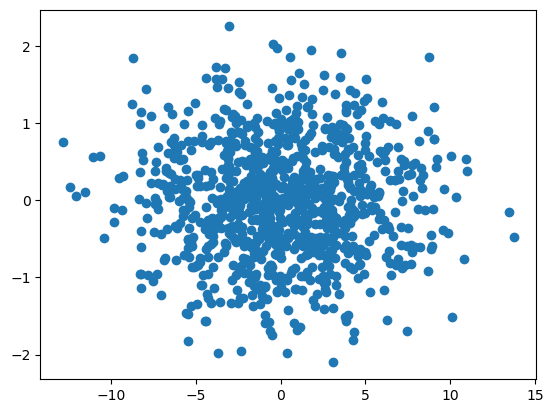

In [160]:
plt.scatter(final_data[:, 0], final_data[:, 1])
plt.show()